# 演習1-5

## パターン識別編（その4）

それでは手書き文字データセット MNIST の識別を行ってみましょう
わからない場合や方針が立たない場合は，PracticeHint フォルダの中にある同名のファイルを眺めてみてください

In [1]:
# 下準備
import os

# proxyの設定．
# keras.datasetsでは，datasetを直接ダウンロードするので，学内マシンからは通常必要．
os.environ["http_proxy"] = "http://proxy.uec.ac.jp:8080/"
os.environ["https_proxy"] = "http://proxy.uec.ac.jp:8080/"
# os.environ["CUDA_VISIBLE_DEVICES"] = "0"    # IEDの場合，必要に応じて指定．未指定はランダムに割り当てられる．

In [2]:
import numpy as np
import matplotlib.pylab as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist

MNIST のデータセットの読み込みを `keras.datasets.mnist.load_data()` で行うと，学習用の文字データとラベル，テスト用の文字データとラベルが返ってくる

In [3]:
# データセットの読み込み
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 数値データは 28 x 28 の画素からなり， 画素値は　[0, 255] の数値．　画素値が大きいと取り扱いにくいので，全部 [0, 1] へ標準化

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

### これで下準備完了

(x_train, y_train) にデータが入っていて，(x_test, y_test) に評価用のデータが入っている

ためしにデータを表示させt見る

label =  5


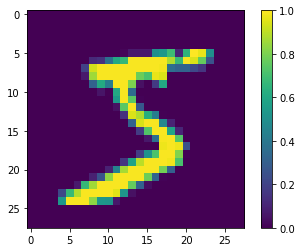

In [4]:
# 試しに　 x_train の０番目の文字を表示させてみる

plt.imshow(x_train[0])
print('label = ', y_train[0])
plt.colorbar()

データの次元が 28 x 28 だが，次元が大きくなっただけなので
ロジスティック回帰は使えるので試す．

$f(x; w) = \sigma( w_1 x + w_0)$ の $w_1$ がベクトルになり $w_1 x$ の演算が内積になるのは２変数のときと一緒．


大きく変わるのは，

* 分類が１０クラス分類になるところ,この場合は，活性化関数には 'softmax' を使うこと
* ロス関数も カテゴリ分類のロス関数 'categorical_crossentropy' を使う．

ここらへんの理屈は知りたい人は質問してください．

本質部分である

## モデル $f(x_n; w)$ のロスが小さくなるように $w$ を求める．

という部分は変わりません．

## Keras + TensorFlow を用いて，MNISTデータセットをロジスティック回帰を用いて分類しなさい．

ロジスティック回帰に関しては演習 1-3 を参照のこと

In [5]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical

In [6]:
# ラベルデータを tensorflow の形式に合致するよう変換 

# データは， 28x 28 =784 次元で，２次元配列の形をしている意味は今はないので，
# reshape で１次元になおしてしまおう

input_shape = 28 * 28
x_train = x_train.reshape(60000, input_shape)
x_test = x_test.reshape(10000, input_shape)

# 他クラス分類ように y をカテゴリカルな変数に変換
num_classes = 10
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

(10,)


モデル構築は演習1-3 とほぼ一緒だけれども，多クラス分類になっている点が少々事情が異なる．演習1-3 のロジスティック回帰では，2クラス分類だったのが，今度は10クラス分類となるため，出力に10個のユニットを配置して，各ユニットがクラスを表現するようにする．
このため，0 番目のクラスは　`[1,0,0,0,0,0,0,0,0,0]`, 1番目のクラスは `[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]` のようにユニットの 0/1 でクラスを表現するようになる．（この表現を 1-hot-vector と呼んだりする）
この変換を行ってくれるのが `to_categorical` メソッドです．

さらに最終ユニットの出力が確率となるようにするために，ユニットの出力活性に `softmax` と呼ばれる関数を導入する．これは，多クラス分類のロジスティック関数みたいなものと思えばよいです．
それで，`softmax` を導入するとロス関数の形もかわって `categorical_crossentropy` という範疇にすることになります．
詳しくは `PracticeHint/` を参照のこと

In [7]:
# 以下にコードを書いていくこと
model = Sequential()   
model.add(Dense(num_classes, input_shape=(input_shape,), use_bias=True)) 
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',  optimizer='adam')

2022-01-27 03:33:09.193722: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
#デバックの為分割
hist = model.fit(x_train, y_train, epochs=8192, batch_size=100, verbose=0)

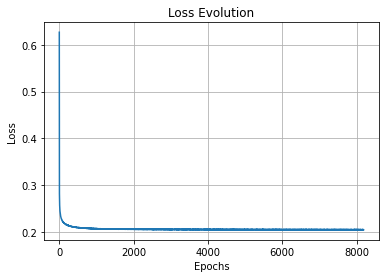

In [9]:
# ロスの値が学習によってどう変わるかを表示すること
plt.plot(hist.history['loss'])
plt.title('Loss Evolution')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()

In [10]:
# x_test[0, :] のパターンと，分類結果を表示しなさい
p=0
print('True Label',np.argmax[y_test[p]])
print('Estimate Label',np.argmax[model.predict(x_test[p:p+1])])
plt.imshow(x_test[p].reshape(28,28))
plt.colorbar()

TypeError: 'function' object is not subscriptable

In [ ]:
# x_test データがどの程度正しく分類できているかを評価しなさい
y_predict = np.argmax(model.predict(x_test),axis=-1)
residual = to_categorical(y_predict)-y_test

errsum = residual.max(axis=1).sum()
print( "Error rate = %.3f" % (errnum / 10000))
print("Error rate = %.3f" %(errnum/10000))

## 考察
演習の回答と照らして工夫したところがあれば，箇条書きで良いので以下にアピールしてください． 
例: パラメータを初期値から変えてみた，epoch数を増やしてみたなど